<a href="https://colab.research.google.com/github/PedroOlavo/Bolsa_IC/blob/main/Tarefa_Ic_Joelho_Canal1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teste de rede neural com o banco que criei a partir do canal 1, foram usadas 4 métricas para avaliar se o classificador estava funcionando bem.

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/banco_canal1')
dados.shape

(86, 1502)

In [ ]:
dados.drop(columns=['Unnamed: 0'], inplace=True)
dados.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,class
0,-0.0008,-0.0008,-0.0008,0.0007,0.0030,0.0015,0.0015,0.0015,0.0022,0.0022,0.0000,0.0007,0.0022,0.0015,0.0045,0.0030,0.0045,0.0030,0.0007,0.0007,-0.0008,0.0000,0.0007,0.0022,0.0052,0.0052,0.0090,0.0105,0.0120,0.0105,0.0105,0.0112,0.0127,0.0165,0.0135,0.0127,0.0090,0.0082,0.0045,0.0015,...,0.0517,0.0615,0.0615,0.0532,0.0352,0.0090,-0.0053,0.0105,0.0142,-0.0008,-0.0135,-0.0285,-0.0203,-0.0188,-0.0233,-0.0293,-0.0315,-0.0091,0.0015,-0.0023,-0.0098,-0.0165,0.0045,0.0457,0.0817,0.0832,0.0555,0.0165,-0.0181,-0.0383,-0.0458,-0.0308,-0.0240,-0.0270,-0.0293,-0.0368,-0.0368,-0.0458,-0.0698,0
1,-0.0773,-0.0615,-0.0346,-0.0015,0.0232,0.0502,0.0697,0.0735,0.0885,0.0975,0.1005,0.0750,0.0082,-0.0503,-0.0630,-0.0330,-0.0143,-0.0165,-0.0173,-0.0218,-0.0256,-0.0181,-0.0075,0.0037,0.0067,-0.0008,-0.0105,-0.0143,-0.0181,-0.0218,-0.0225,-0.0203,-0.0165,-0.0188,-0.0105,0.0045,0.0090,0.0142,0.0202,0.0345,...,0.0015,0.0000,-0.0023,-0.0030,-0.0038,-0.0008,-0.0008,-0.0008,-0.0008,-0.0015,-0.0023,-0.0015,-0.0008,-0.0053,-0.0083,-0.0105,-0.0128,-0.0143,-0.0143,-0.0143,-0.0158,-0.0120,-0.0091,-0.0053,-0.0023,-0.0008,-0.0030,-0.0015,0.0030,-0.0008,-0.0008,-0.0023,-0.0015,0.0000,0.0015,0.0030,0.0030,0.0045,0.0030,0
2,0.0060,0.0067,0.0090,0.0082,0.0067,0.0082,0.0090,0.0105,0.0105,0.0105,0.0075,0.0097,0.0082,0.0052,0.0075,0.0052,0.0067,0.0105,0.0097,0.0082,0.0075,0.0090,0.0105,0.0142,0.0142,0.0127,0.0112,-0.0008,0.0015,0.0082,0.0030,0.0015,-0.0015,-0.0008,-0.0015,0.0007,0.0030,0.0007,0.0007,0.0030,...,-0.0008,0.0015,0.0015,0.0052,0.0075,0.0052,0.0105,0.0082,0.0067,0.0060,0.0060,0.0060,0.0015,0.0007,-0.0015,-0.0015,-0.0023,-0.0015,-0.0023,-0.0046,-0.0030,0.0000,0.0015,0.0052,0.0060,0.0060,0.0052,0.0037,0.0022,-0.0008,0.0015,0.0022,0.0015,0.0015,-0.0008,-0.0038,-0.0015,0.0007,-0.0008,0
3,-0.0015,0.0015,0.0007,0.0015,0.0015,-0.0015,-0.0015,-0.0015,-0.0046,-0.0030,-0.0046,-0.0046,-0.0068,-0.0075,-0.0068,-0.0068,-0.0046,-0.0046,-0.0038,-0.0015,-0.0030,-0.0030,-0.0023,-0.0030,-0.0008,0.0015,0.0015,0.0090,0.0165,0.0157,0.0157,0.0127,0.0112,0.0097,0.0067,0.0045,0.0007,-0.0038,-0.0098,-0.0158,...,-0.0143,-0.0128,-0.0120,-0.0143,-0.0105,-0.0046,-0.0023,-0.0120,-0.0353,-0.0150,0.0165,-0.0188,-0.0368,-0.0270,-0.0270,-0.0060,-0.0015,0.0075,0.0202,0.0180,0.0277,0.0240,0.0240,0.0367,0.0390,0.0352,0.0307,0.0210,0.0045,-0.0038,0.0142,0.0217,0.0097,-0.0060,-0.0270,-0.0338,-0.0270,-0.0285,-0.0278,0
4,-0.0293,-0.0203,-0.0015,0.0135,0.0127,-0.0053,-0.0143,-0.0218,-0.0233,-0.0195,-0.0091,0.0015,0.0007,-0.0083,0.0015,0.0202,0.0330,0.0322,0.0112,0.0030,0.0067,0.0127,0.0127,0.0105,0.0090,0.0067,0.0195,0.0217,0.0090,-0.0008,-0.0030,0.0037,0.0052,-0.0068,-0.0120,-0.0225,-0.0405,-0.0405,-0.0293,-0.0181,...,0.0007,-0.0046,-0.0038,-0.0105,-0.0143,-0.0105,-0.0030,-0.0015,-0.0053,-0.0060,-0.0075,-0.0091,-0.0091,-0.0060,-0.0060,-0.0105,-0.0120,-0.0150,-0.0195,-0.0256,-0.0330,-0.0240,-0.0060,0.0022,0.0037,-0.0008,-0.0068,-0.0091,-0.0060,-0.0023,0.0105,0.0210,0.0262,0.0360,0.0352,0.0315,0.0330,0.0315,0.0195,0


In [ ]:
from sklearn.model_selection import train_test_split
y = dados['class']
dados.drop(columns=['class'], inplace=True)
x = dados
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train.head()


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
62,-0.0046,-0.0030,-0.0008,0.0015,0.0007,0.0015,-0.0008,0.0000,0.0015,0.0007,0.0000,-0.0030,-0.0008,0.0000,0.0007,0.0015,0.0030,0.0045,0.0045,0.0037,0.0037,0.0045,0.0045,0.0022,0.0022,0.0022,0.0015,0.0015,0.0022,0.0022,0.0030,0.0022,0.0015,0.0007,0.0015,0.0030,0.0037,0.0022,0.0045,0.0060,...,0.0142,0.0120,0.0097,0.0082,0.0052,0.0007,-0.0015,-0.0015,0.0015,0.0060,0.0090,0.0142,0.0172,0.0180,0.0172,0.0142,0.0127,0.0142,0.0157,0.0090,0.0030,0.0082,0.0127,0.0097,0.0015,-0.0030,-0.0030,-0.0046,-0.0053,-0.0015,-0.0008,-0.0008,0.0000,-0.0008,-0.0008,-0.0015,-0.0030,-0.0038,-0.0038,-0.0030
60,-0.0008,-0.0030,-0.0068,-0.0068,-0.0046,-0.0008,0.0022,0.0045,0.0037,0.0045,0.0075,0.0082,0.0052,0.0037,0.0045,0.0045,0.0045,0.0015,0.0007,-0.0015,-0.0053,-0.0046,-0.0053,-0.0105,-0.0128,-0.0091,-0.0068,-0.0046,-0.0030,-0.0068,-0.0068,-0.0030,0.0052,0.0090,0.0060,0.0045,0.0082,0.0097,0.0045,0.0067,...,-0.0015,-0.0030,-0.0008,0.0007,-0.0008,-0.0008,0.0000,0.0000,0.0030,0.0067,0.0090,0.0067,-0.0008,-0.0083,-0.0105,-0.0120,-0.0120,-0.0083,-0.0068,-0.0075,-0.0053,-0.0015,0.0037,0.0030,0.0030,0.0030,0.0030,0.0045,0.0030,0.0007,0.0015,0.0022,-0.0015,-0.0023,-0.0046,-0.0068,-0.0060,-0.0068,-0.0098,-0.0105
49,0.0052,0.0045,0.0052,0.0082,0.0097,0.0090,0.0082,0.0045,0.0052,0.0052,0.0037,0.0007,-0.0023,-0.0023,-0.0046,-0.0030,-0.0030,-0.0053,-0.0046,-0.0053,-0.0038,-0.0038,-0.0030,-0.0038,-0.0015,-0.0023,-0.0030,0.0007,0.0030,0.0060,0.0090,0.0097,0.0120,0.0142,0.0142,0.0157,0.0165,0.0172,0.0157,0.0112,...,0.0052,0.0022,-0.0015,-0.0023,-0.0015,-0.0046,-0.0053,-0.0083,-0.0091,-0.0105,-0.0143,-0.0195,-0.0233,-0.0263,-0.0308,-0.0330,-0.0330,-0.0330,-0.0323,-0.0353,-0.0398,-0.0390,-0.0390,-0.0390,-0.0390,-0.0383,-0.0368,-0.0338,-0.0308,-0.0248,-0.0195,-0.0158,-0.0105,-0.0075,-0.0046,-0.0023,0.0015,0.0045,0.0037,0.0067
33,0.0015,0.0007,0.0007,0.0022,0.0022,0.0000,-0.0008,0.0000,-0.0015,0.0000,0.0000,-0.0008,0.0007,0.0007,-0.0023,-0.0030,-0.0008,0.0000,-0.0008,-0.0008,0.0000,0.0007,-0.0008,0.0015,0.0045,0.0022,-0.0008,-0.0015,-0.0008,-0.0023,-0.0008,-0.0015,-0.0023,-0.0008,-0.0015,-0.0046,-0.0053,-0.0023,-0.0008,-0.0038,...,-0.0030,-0.0023,-0.0046,-0.0030,-0.0030,-0.0015,-0.0008,0.0007,0.0007,-0.0015,-0.0015,-0.0023,-0.0023,0.0000,0.0022,0.0030,0.0015,0.0015,0.0007,0.0007,0.0007,-0.0008,-0.0030,-0.0038,-0.0023,-0.0023,-0.0046,-0.0068,-0.0053,-0.0046,-0.0023,-0.0008,-0.0015,-0.0023,-0.0023,0.0000,-0.0008,0.0007,0.0030,0.0045
39,-0.0008,0.0015,0.0052,0.0090,0.0105,0.0090,0.0165,0.0285,0.0307,0.0367,0.0420,0.0270,-0.0038,-0.0330,-0.0428,-0.0270,-0.0300,-0.0495,-0.0608,-0.0593,-0.0458,-0.0420,-0.0315,-0.0046,0.0232,0.0405,0.0382,0.0367,0.0360,0.0442,0.0547,0.0570,0.0502,0.0270,-0.0030,-0.0315,-0.0563,-0.0570,-0.0375,-0.0248,...,-0.0773,0.0022,0.0090,0.0277,0.0202,-0.0083,-0.0691,-0.0645,-0.0240,-0.0683,-0.0540,0.0060,0.0532,0.0727,0.0465,0.0292,0.0022,-0.0218,-0.0533,-0.0833,-0.0645,-0.0338,-0.0218,-0.0173,-0.0053,0.0075,0.0120,0.0187,0.0292,0.0465,0.0720,0.0862,0.0840,0.0787,0.0465,-0.0150,-0.0210,0.0277,0.0292,0.0270


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit_transform(X_train)

array([[ 8.04655033e-02,  9.57367913e-02,  9.84828051e-02, ...,
         1.01834258e-01,  8.93192860e-02,  1.10278999e-01],
       [ 1.39098085e-01,  9.57367913e-02,  1.40227433e-03, ...,
         5.85312423e-02,  2.60153260e-03,  2.45009996e-05],
       [ 2.31675845e-01,  2.11485196e-01,  1.95563336e-01, ...,
         2.21639266e-01,  1.97716478e-01,  2.52874817e-01],
       ...,
       [ 1.08802013e+00,  1.17142530e+00,  1.53042063e+00, ...,
        -1.24055921e+00, -1.10304982e+00, -9.92265982e-01],
       [ 2.20875106e-01,  1.65185834e-01,  1.11426876e-01, ...,
         1.66788780e-01,  1.76037039e-01,  1.32329899e-01],
       [ 1.39098085e-01,  1.52839337e-01,  9.84828051e-02, ...,
         2.31743303e-01,  2.41075354e-01,  2.42584397e-01]])

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
rede = MLPClassifier(activation='identity',random_state=1)

In [ ]:
layers = [(10,),(20,),(30,),(40,),(50,),(2,2),(3,3),(4,4),(5,5)]
df = pd.DataFrame(columns=['Camadas', 'Acurácia', 'Precisão', 'Recall', 'F1 Score'])
i = 0
for layer in layers:
  lista = []
  rede = MLPClassifier(hidden_layer_sizes=layer, random_state=1);
  rede.fit(X_train,Y_train);
  pred = rede.predict(X_test);
  acc = accuracy_score(Y_test, pred);
  prec = precision_score(Y_test, pred);
  rec = recall_score(Y_test, pred);
  f1 = f1_score(Y_test, pred);
  lista.append(layer)
  lista.append(acc)
  lista.append(prec)
  lista.append(rec)
  lista.append(f1)
  df.loc[i] = lista
  i = i + 1

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
ativações = ['relu', 'identity', 'logistic', 'tanh']
layers = [(10,),(20,),(30,),(40,),(50,),(2,2),(3,3),(4,4),(5,5)]
df = pd.DataFrame(columns=['Ativação','Camadas', 'Acurácia', 'Precisão', 'Recall', 'F1 Score'])
i = 0
for ativação in ativações:
  i = i
  for layer in layers:
    lista = []
    rede = MLPClassifier(activation=ativação,hidden_layer_sizes=layer,max_iter=300 ,random_state=1);
    rede.fit(X_train,Y_train);
    pred = rede.predict(X_test);
    acc = accuracy_score(Y_test, pred);
    prec = precision_score(Y_test, pred);
    rec = recall_score(Y_test, pred);
    f1 = f1_score(Y_test, pred);
    lista.append(ativação)
    lista.append(layer)
    lista.append(acc)
    lista.append(prec)
    lista.append(rec)
    lista.append(f1)
    df.loc[i] = lista
    i = i + 1

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



variar as camadas escondidas

aumentando e diminuindo os neuronios

testar tbm as diferentes ativações


In [ ]:
df_tanh = df.loc[df['Ativação']=='tanh']
df_relu = df.loc[df['Ativação']=='relu']
df_identity = df.loc[df['Ativação']=='identity']
df_logistic = df.loc[df['Ativação']=='logistic']

In [ ]:
df.Acurácia.max()

0.6153846153846154

In [ ]:
df_logistic

,Ativação,Camadas,Acurácia,Precisão,Recall,F1 Score
18,logistic,"(10,)",0.500000,0.600000,0.400000,0.480000
19,logistic,"(20,)",0.538462,0.636364,0.466667,0.538462
20,logistic,"(30,)",0.576923,0.666667,0.533333,0.592593
21,logistic,"(40,)",0.538462,0.615385,0.533333,0.571429
22,logistic,"(50,)",0.538462,0.615385,0.533333,0.571429
23,logistic,"(2, 2)",0.576923,0.576923,1.000000,0.731707
24,logistic,"(3, 3)",0.500000,1.000000,0.133333,0.235294
25,logistic,"(4, 4)",0.500000,0.666667,0.266667,0.380952
26,logistic,"(5, 5)",0.576923,0.700000,0.466667,0.560000


In [ ]:
melhor_rede = MLPClassifier(hidden_layer_sizes=(3,3) ,activation='logistic', max_iter=300, random_state=1)
melhor_rede.fit(X_train, Y_train)
pred_melhor_rede = melhor_rede.predict(X_test)
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
confusion_matrix(Y_test, pred_melhor_rede)

array([[11,  0],
       [13,  2]])

In [ ]:
precision_score(Y_test, pred_melhor_rede)

1.0

In [ ]:
Y_test.value_counts()

1    15
0    11
Name: class, dtype: int64

In [ ]:
df.groupby(by=['Ativação', 'Camadas']).Precisão.max().sort_values(ascending=False)[:5]


Ativação  Camadas
logistic  (3, 3)     1.000000
          (5, 5)     0.700000
relu      (5, 5)     0.700000
logistic  (30,)      0.666667
          (4, 4)     0.666667
Name: Precisão, dtype: float64

In [ ]:
df.groupby(by=['Ativação', 'Camadas']).Acurácia.max().sort_values(ascending=False)[:5]

Ativação  Camadas
identity  (3, 3)     0.615385
tanh      (3, 3)     0.615385
          (50,)      0.576923
relu      (20,)      0.576923
logistic  (30,)      0.576923
Name: Acurácia, dtype: float64

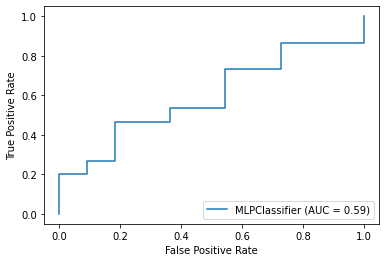

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(melhor_rede, X_test, Y_test)
